# Evaluate trained YOLO v2 model
Use the trained model to detect objects in some PascalVOC sample images. Non-max suppression is applied after the model to remove duplicate closeby detections.

The data (images and annotations) has to be contained in `pascalvoc_data_dir` and the saved model weights in `saved_model_dir`, so make sure these variables are set before running the code.

In [4]:
import os
import json
import numpy as np
import tensorflow as tf
from image_reader import COCOImageReader, PascalVOCImageReader
from data_generator import DataGeneratorFactory
from post_processing import non_max_suppression

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

np.random.seed(231417)

# Load data from this directory
pascalvoc_data_dir = "../../../pascalvocdata/VOC2012/"
# directory containing the saved model
saved_model_dir = '../assets/saved_model_15Jun2022_trained_on_trainval'

number of classes = 20
1/1 [==============================] - 1s 735ms/step


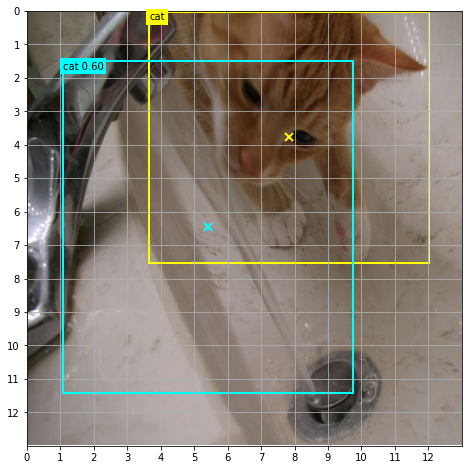

1/1 [==============================] - 0s 367ms/step


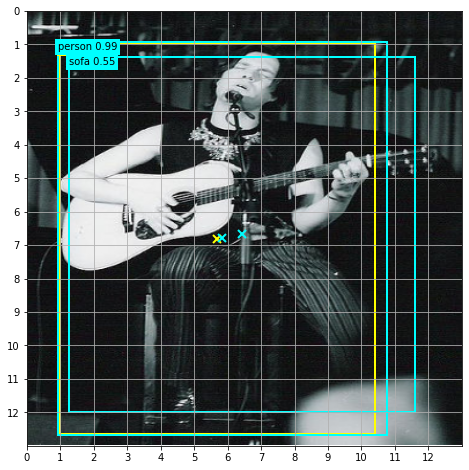

1/1 [==============================] - 0s 427ms/step


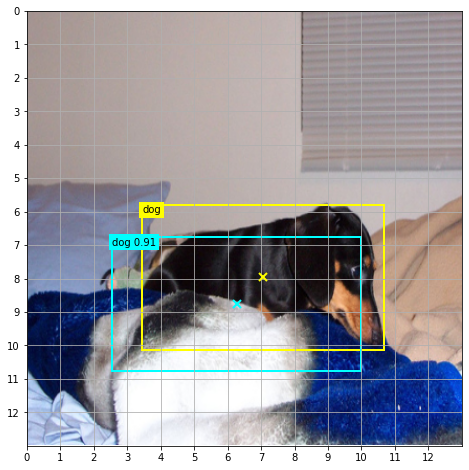

1/1 [==============================] - 1s 752ms/step


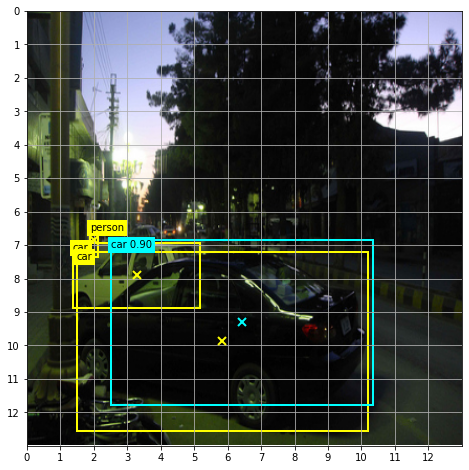

1/1 [==============================] - 0s 354ms/step


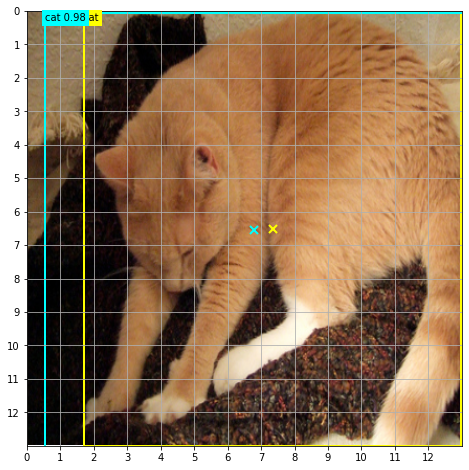

1/1 [==============================] - 0s 413ms/step


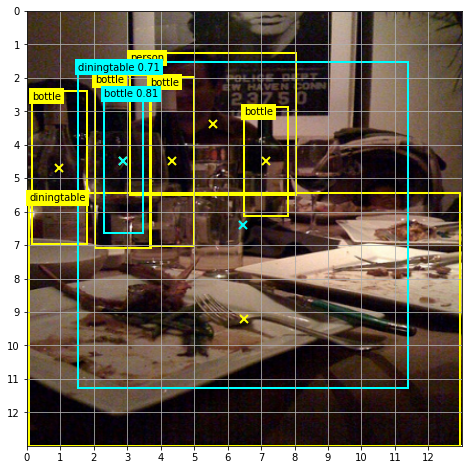

1/1 [==============================] - 1s 508ms/step


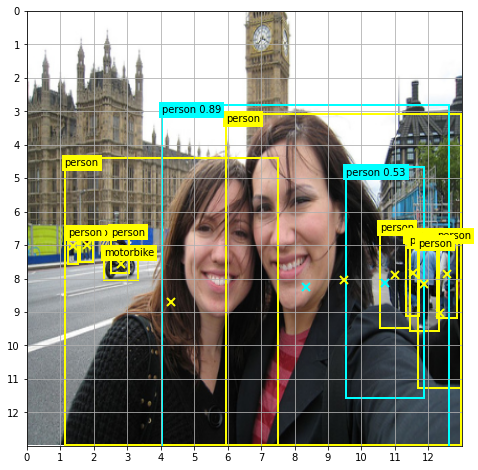

1/1 [==============================] - 0s 371ms/step


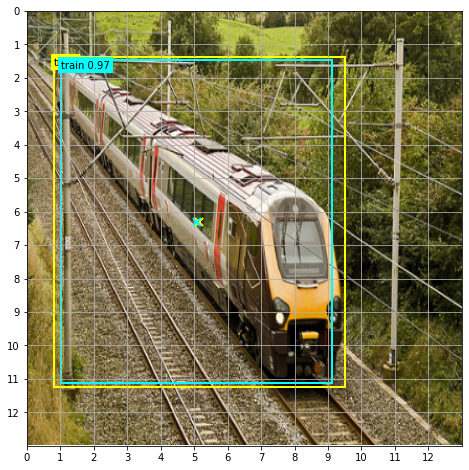

In [10]:
# Load anchor boxes
anchor_boxes_filename = "./data/anchor_boxes_pascalvoc.json"

# Read anchor boxes from json file
with open(anchor_boxes_filename, "r", encoding="utf8") as f:
    anchor_boxes = json.load(f)

# Load saved model from disk
model = tf.keras.models.load_model(saved_model_dir,compile=False)

image_reader = PascalVOCImageReader(data_dir=pascalvoc_data_dir,data_type="val",image_size=416,n_tiles=13)
data_generator = DataGeneratorFactory(anchor_boxes, image_reader,random_shuffle=True,max_images=None)

for x in data_generator.dataset.batch(1).take(8):
    bboxes_true = data_generator.target2bboxes(x[1][0,...])
    y_pred = model.predict(x[0])
    bboxes_pred = non_max_suppression(data_generator.prediction2bboxes(y_pred[0,...],threshold=0.5))
    image_reader.show_annotated_image({'image':x[0][0,...],'bboxes':bboxes_true},
                                             predicted_bboxes=bboxes_pred)
    